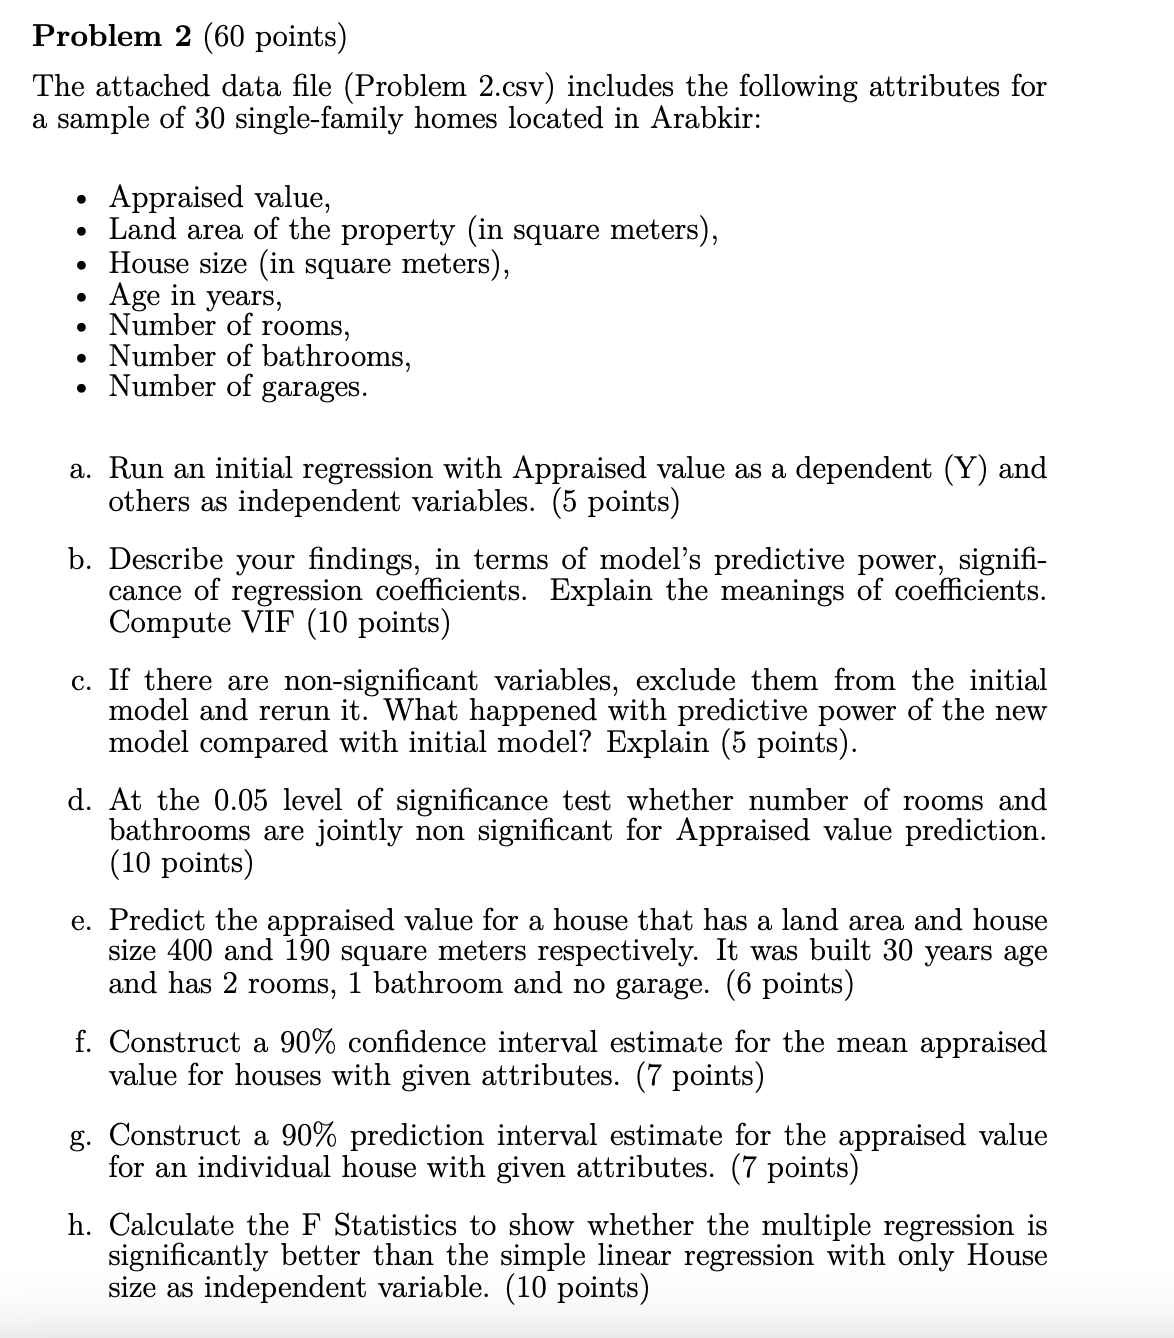

In [92]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import numpy as np
from scipy.stats import t
import statsmodels.formula.api as smf


df = pd.read_csv('problem 2.csv')
df

,N,AppraisedValue,PropertySize,HouseSize,Age,Rooms,Baths,Garage
0,1,466.0,929,227,46,7,3.5,2
1,2,364.0,887,180,51,7,2.5,1
2,3,429.0,659,193,29,5,3.0,2
3,4,548.4,1864,251,18,8,2.5,1
4,5,405.9,1031,190,46,7,1.5,1
5,6,374.1,927,194,88,7,2.0,0
6,7,315.0,732,133,48,7,2.0,0
7,8,749.7,2029,278,7,9,2.5,1
8,9,217.7,902,94,52,5,1.0,0
9,10,635.7,526,297,15,8,2.5,2


In [93]:
#part a
Y = df['AppraisedValue']

X = df[['PropertySize', 'HouseSize', 'Age', 'Rooms', 'Baths', 'Garage']]
X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         AppraisedValue   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     21.37
Date:                Sun, 12 May 2024   Prob (F-statistic):           2.45e-08
Time:                        23:18:59   Log-Likelihood:                -157.53
No. Observations:                  30   AIC:                             329.1
Df Residuals:                      23   BIC:                             338.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           82.1599     68.663      1.197   

#part b
The R-squared value is 0.848, which shows that approximately 84.8% of the variability in the appraised value of the homes is explained by the model's predictors. This indicates a strong predictive power.
Moreover,the adjusted R-squared value is 0.808, which accounts for the number of predictors used relative to the number of data points. This value is also quite high, confirming that the model fits well with the data.
Now let's see the coefficients

For the PropertySize we have the coefficient = 0.0722 and p-value = 0.001. This suggests  significant positive relationship between property size and the appraised value, with each additional square meter of property size increasing the appraised value by 0.0722 units.

For the  HouseSize the coefficient = 1.0867, p-value = 0.001. This also shows postivie relationship between house szie and appraised value

For the Age the relatioship is negative as coefficient = -1.253. Age shows a significant negative effect on the appraised value, with older homes having lower values.

Rooms, Baths, Garage: These variables are not statistically significant (high p-values), suggesting they do not have a significant impact on the appraised value in this model.

In [94]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Variable,VIF
0,const,50.891097
1,PropertySize,1.280024
2,HouseSize,2.457500
3,Age,1.598090
4,Rooms,1.305126
5,Baths,1.708723
6,Garage,1.891484


In [95]:
#part c
#From our regression output, it's noted that "Rooms," "Baths," and 
#"Garage" have high p-values, making them non-significant in 
#predicting the appraised value. So I will exclude them

df2 = pd.read_csv('problem 2.csv')

Y = df2['AppraisedValue']

X = df2[['PropertySize', 'HouseSize', 'Age']]
X = sm.add_constant(X)  

model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         AppraisedValue   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     42.39
Date:                Sun, 12 May 2024   Prob (F-statistic):           3.73e-10
Time:                        23:19:06   Log-Likelihood:                -159.18
No. Observations:                  30   AIC:                             326.4
Df Residuals:                      26   BIC:                             332.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          136.1477     53.771      2.532   

The adjusted R-squared in the refined model is 0.811, compared to 0.808 in the initial model. This slight increase suggests that, even after removing the non-significant variables, the model explains nearly the same proportion of variance in the appraised value, but more efficiently due to fewer variables.

All remaining variables (PropertySize, HouseSize, and Age) are significant with p-values well below 0.05, suggesting a strong statistical significance in predicting the appraised value. The coefficients for HouseSize and Age are particularly notable:

A positive coefficient of 1.3909 indicates that as the house size increases by one unit, the appraised value increases by about 1.3909 units.

A negative coefficient of -1.3989 suggests that as the age of the property increases by one year, the appraised value decreases by approximately 1.3989 units.

In [96]:
#d
X_full = df[['PropertySize', 'HouseSize', 'Age', 'Rooms', 'Baths', 'Garage']]
X_full = sm.add_constant(X_full) 
Y = df['AppraisedValue']
model_full = sm.OLS(Y, X_full).fit()

X_reduced = df[['PropertySize', 'HouseSize', 'Age', 'Garage']]
X_reduced = sm.add_constant(X_reduced)  
model_reduced = sm.OLS(Y, X_reduced).fit()

anova_results = anova_lm(model_reduced, model_full)
print(anova_results)

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0      25.0  69844.018343      0.0          NaN       NaN       NaN
1      23.0  63921.796960      2.0  5922.221383  1.065451  0.360975


The high p-value (0.360975) suggests that the number of rooms and bathrooms, when considered together, do not significantly contribute to predicting the appraised value of the homes at the 5% significance level. This means there is no strong statistical evidence to indicate that including these variables in the model provides a significant improvement in model fit over the reduced model without these variables.

In [97]:
#e

intercept = 82.1599
coef_property_size = 0.0722
coef_house_size = 1.0867
coef_age = -1.2530
coef_rooms = 10.6993  
coef_baths = 6.4089   
coef_garage = 15.8530 

property_size = 400  
house_size = 190    
age = 30           
rooms = 2           
baths = 1           
garage = 0         

appraised_value = (intercept + 
                   (coef_property_size * property_size) + 
                   (coef_house_size * house_size) + 
                   (coef_age * age) + 
                   (coef_rooms * rooms) + 
                   (coef_baths * baths) + 
                   (coef_garage * garage))

print("Predicted Appraised Value: ", appraised_value)


Predicted Appraised Value:  307.73040000000003


In [98]:
#f
import numpy as np
import statsmodels.api as sm
from scipy.stats import t

mse = model.mse_resid 
X_matrix = sm.add_constant(df[['PropertySize', 'HouseSize', 'Age','Rooms', 'Baths', 'Garage']])  # Model matrix
n, k = X_matrix.shape
df_resid = n - k  


x_0 = np.array([1, 400, 190, 30,2,1,0]) 

x_0_T_XTX_x_0 = np.dot(np.dot(x_0.T, np.linalg.inv(np.dot(X_matrix.T, X_matrix))), x_0)
se_y_hat = np.sqrt(mse * x_0_T_XTX_x_0)

t_critical = t.ppf(0.95, df_resid)

lower_bound = appraised_value - t_critical * se_y_hat
upper_bound = appraised_value + t_critical * se_y_hat

print(f"90% Confidence Interval: [{lower_bound}, {upper_bound}]")


90% Confidence Interval: [217.59280442528177, 397.8679955747183]


In [99]:
#g
X = df[['PropertySize', 'HouseSize', 'Age', 'Rooms', 'Baths', 'Garage']]
X = sm.add_constant(X) 
Y = df['AppraisedValue']

model = sm.OLS(Y, X).fit()

new_data = {'const': 1, 'PropertySize': 400, 'HouseSize': 190, 'Age': 30, 'Rooms': 2, 'Baths': 1, 'Garage': 0}
new_data_df = pd.DataFrame([new_data])

predicted_value = model.predict(new_data_df)[0]


mse = model.mse_resid
cov_matrix = model.cov_params()

x_0 = new_data_df.iloc[0].values

var_pred = np.dot(np.dot(x_0, cov_matrix), x_0.T)

se_prediction = np.sqrt(mse * (1 + var_pred))

df_resid = model.df_resid

t_critical = t.ppf(0.95, df_resid)

lower_bound = predicted_value - t_critical * se_prediction
upper_bound = predicted_value + t_critical * se_prediction

print(f"90% Prediction Interval: [{lower_bound}, {upper_bound}]")


90% Prediction Interval: [-4475.703342062873, 5091.139268757383]


In [100]:
#h
simple_model = smf.ols('AppraisedValue ~ HouseSize', data=df).fit()

full_model = smf.ols('AppraisedValue ~ PropertySize + HouseSize + Age + Rooms + Baths + Garage', data=df).fit()

rss_simple = sum(simple_model.resid ** 2)
rss_full = sum(full_model.resid ** 2)

p_full = len(full_model.params)  
p_simple = len(simple_model.params) 

n = len(df)

numerator = (rss_simple - rss_full) / (p_full - p_simple)
denominator = rss_full / (n - p_full)
f_statistic = numerator / denominator

print(f"F-statistic: {f_statistic}")

from scipy.stats import f
p_value = 1 - f.cdf(f_statistic, (p_full - p_simple), (n - p_full))
print(f"P-value: {p_value}")


F-statistic: 4.872655775993231
P-value: 0.0034814005918257784


A higher F-statistic generally suggests that the model extensions (additional predictors) have a substantial impact on the model’s explanatory power.Since the P-value is less than 0.05, we reject the null hypothesis. This means there is statistically significant evidence that the multiple regression model with additional predictors (PropertySize, Age, Rooms, Baths, and Garage) provides a better fit to the data than the simple linear regression model using only "HouseSize."

